# Exercise from chap01ex.ipynb, exclude the prefilled book demo code


In [12]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [13]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

Read NSFG data into a Pandas DataFrame.

In [14]:
import nsfg

In [15]:
preg = nsfg.ReadFemPreg()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


## exercise 1.1 start from here:

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [26]:
birthord = preg['birthord']

We can also use `isnull` to count the number of nans.

In [27]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [28]:
preg.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [29]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [30]:
preg['totalwgt_kg'] = preg.totalwgt_lb*0.45359237
preg.totalwgt_kg.mean()

3.295633631632828

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [31]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [32]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [33]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [34]:
resp.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [35]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [36]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118448
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.494758
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.899418
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118448


How old is the respondent with `caseid` 1?

In [41]:
resp[resp.caseid==1].age_r


1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [42]:
preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [48]:
preg[preg.caseid==5012]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
5515,5012,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,2335.279149,2846.79949,4744.19135,2,18,NaN,6.0,2.721554


In [50]:
#preg[preg.caseid==5012][preg.pregordr==1].totalwgt_lb
preg[(preg.caseid==5012) & (preg.pregordr==1)].totalwgt_lb

5515    6.0
Name: totalwgt_lb, dtype: float64

# End of exercise 1.1

# Exercise 1.2: Create a file named chap01ex.py and write code that reads the respondent file, 2002FemResp.dat.gz

In [12]:
import sys
import numpy as np
import thinkstats2

from collections import defaultdict

# read respondant file
def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):

    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    #CleanFemResp(df)
    return df

#read preg file
def ReadFemPreg(dct_file='2002FemPreg.dct',
                dat_file='2002FemPreg.dat.gz'):

    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    CleanFemPreg(df)
    return df

def ValidatePregnum(resp, preg):
    # make the map from caseid to list of pregnancy indices
    preg_map = MakePregMap(preg)
    
    # iterate through the respondent pregnum series
    for index, pregnum in resp.pregnum.items():
        caseid = resp.caseid[index]
        indices = preg_map[caseid]

        # check that pregnum from the respondent file equals
        # the number of records in the pregnancy file
        if len(indices) != pregnum:
            print(caseid, len(indices), pregnum)
            return False

    return True


def MakePregMap(df):
    d = defaultdict(list)
    for index, caseid in df.caseid.items():
        d[caseid].append(index)
    return d


def main():

    # read and validate the respondent file
    
    resp = ReadFemResp()

    assert(len(resp) == 7643)
    assert(resp.pregnum.value_counts()[1] == 1267)

    print('All tests passed.')


if __name__ == '__main__':
    main()


All tests passed.


## End of exercise 1.2

# 2-1 (Based on the results in this chapter, suppose you were asked to summarize what you learned about whether first babies arrive late…)

### Answer: Dear reader, from the CDC pregnancy data, we did an data analysis on pregnancy length on first born and other babies. The data show Mean pregnancy length for first babies is 38.601; for other babies it is 38.523. So for first born, the average is actually 2 weeks shorter than 40 weeks full term pregnancy. Meanwhile, all for birth,  the mean pregnancy length is 38.6 weeks, the standard deviation is 2.7 weeks, which means we should expect deviations of 2-3 weeks to be common from the average. So giving birth after full term of 40 weeks is a small chance event, not to mention most doctor will intervene if babies arrives late. 

# (Which summary statistics would you use if you wanted to get a story on the evening news? Which ones would you use if you wanted to reassure an anxious patient?)

### Answer: I would use the mean and stand deviation (variance) to show the average and variation range from average born weeks.  Effect size is also useful to tell how much the variation mean to the whole length of the pregnancy period. 

## End of exericse 2-1

# 2-4 (Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others…)

### Answer: Using The solution program provided or program developed below, the result is as below. 
#### Mean
#### First babies 7.201094430437772
#### Others 7.325855614973262
#### Variance
#### First babies 2.0180273009157768
#### Others 1.9437810258964572
#### Difference in lbs -0.12476118453549034
#### Difference in oz -1.9961789525678455
#### Difference relative to mean (%age points) -1.7171423678372415
#### Cohen d -0.088672927072602

### so, the first babies is slightly lighter (~2 oz) than others, but the difference is just a fraction of the first babies mean (less than 2%). However,  Based on the Cohen-D value, the variation on baby weight is bigger than the variation in pregnancy length


### the code for exercise 2-4 is below:

firsts mean 7.201094430437772
others mean 7.325855614973262
firsts var 2.0180273009157768
second var 1.9437810258964572
Cohen d -0.08864367587767745


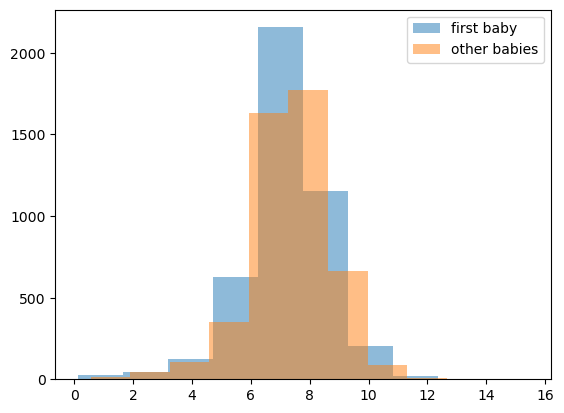

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy


import nsfg


def read_data():
    preg = nsfg.ReadFemPreg()

    live = preg[preg.outcome == 1]
    firsts = live[live.birthord == 1]
    others = live[live.birthord != 1]

    return live, firsts, others


def calculate(live, firsts, others):
    mean = live.totalwgt_lb.mean()
    var = live.totalwgt_lb.var()
    std = live.totalwgt_lb.std()

    #print('Live mean', mean)
    #print('Live variance', var)
    #print('Live std', std)

    mean1 = firsts.totalwgt_lb.mean()
    mean2 = others.totalwgt_lb.mean()
    print('firsts mean', mean1)
    print('others mean', mean2)
#
    var1 = firsts.totalwgt_lb.var()
    var2 = others.totalwgt_lb.var()
    print('firsts var', var1)
    print('second var', var2)

    # calculate Choen D
    diff = mean1 - mean2
    n1, n2 = len(firsts.totalwgt_lb), len(firsts.totalwgt_lb)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    print('Cohen d', d)

    plt.hist(firsts.totalwgt_lb, label='first baby', alpha=0.5)
    plt.hist(others.totalwgt_lb, label='other babies', alpha=0.5)
    plt.legend(loc='best')
    plt.show()


def main(script):
    live, firsts, others = read_data()
    calculate(live, firsts, others)
    
if __name__ == '__main__':
    import sys
    main('test')